In [1]:
# Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sys
import plotly as pt
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
sns.set()  

In [2]:
# Leer el archivo 'datos.csv'
df = pd.read_excel("DataSet/P1_Serie_Acceso_Internet.xlsx")

# Ajuste de Dataframe
df.columns  =["Periodo", "Colombia"]

df.Periodo = pd.to_datetime(df.Periodo)
df.set_index('Periodo', inplace=True)

In [4]:
# Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 1994-12-31 to 2019-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Colombia  26 non-null     float64
dtypes: float64(1)
memory usage: 416.0 bytes


### $\color{red}{\text{Distribucción inicial de la serie}}$

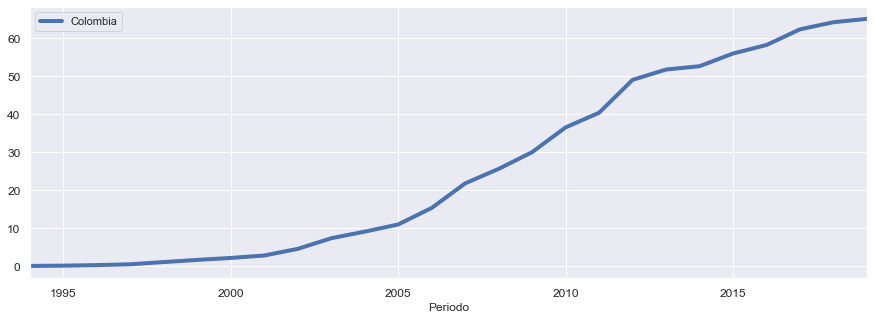

In [5]:
df.plot(figsize=(15,5),linewidth=4, fontsize=12);

### $\color{red}{\text{Esta serie es estacionaria?}}$

In [6]:
result = adfuller(df['Colombia'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.702899
p-value: 0.999087
Critical Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674


### $\color{black}{\text{ En este caso, el test rechaza la Ho de que la serie no es estacionaria, luego la serie es estacionaria}}$

### $\color{red}{\text{Construya y grafique el componente de tendencia de la serie de tiempo -  Promedio Movil -12 meses}}$

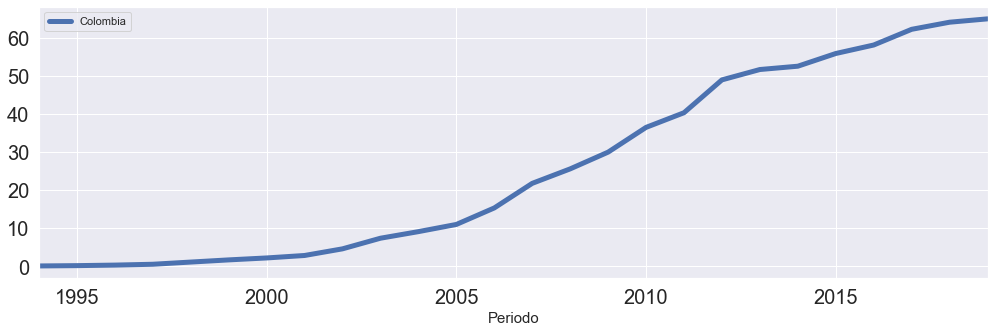

In [10]:
df.rolling(1).mean().plot(figsize=(17,5), linewidth=5, fontsize=20)
plt.xlabel('Periodo', fontsize=15);

### $\color{red}{\text{Construya y grafique el componente estacional de la serie de tiempo}}$

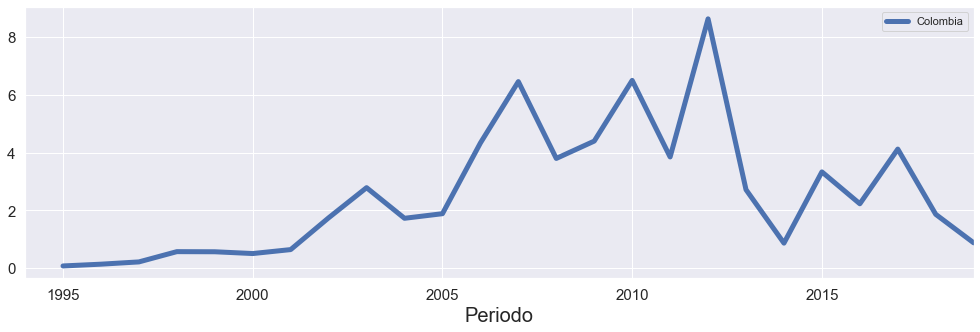

In [11]:
df.diff().plot(figsize=(17,5), linewidth=5, fontsize=15)
plt.xlabel('Periodo', fontsize=20);

### $\color{red}{\text{¿Es estacionaria la serie de tiempo sin tendencia?}}$ 

In [12]:
result = adfuller(df['Periodo'].diff().iloc [ 1 :]) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

KeyError: 'Periodo'

### $\color{black}{\text{Al retirar la tendencia, se rechaza Ho de que la serie no es estacionaria, luego la serie es estacionaria}}$

### $\color{red}{\text{Construya una gráfica para analizar la autocorrelación.}}$

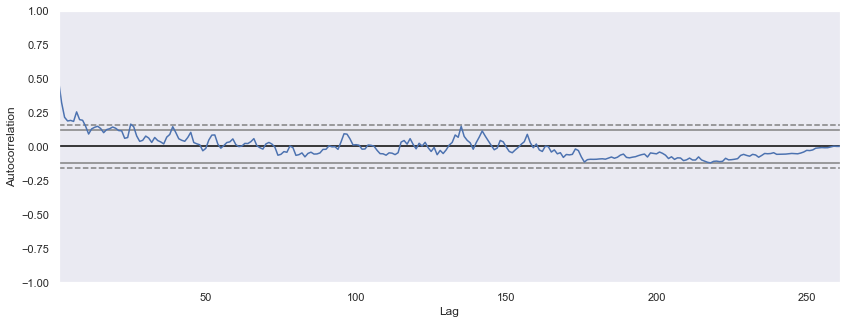

In [20]:
plt.figure(figsize=(14,5))
pd.plotting.autocorrelation_plot(df);

### $\color{black}{\text{Para esta serie de datos, no se encuentra correlación fuerte, concluyendo que la serie de Vicente no se encuentra correlacionada con lags vistos a 12 meses.}}$